In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths
import os
# %matplotlib.inline

# Load Image

In [2]:
image_paths = list(paths.list_images("./raw"))

# Create Denoised Dataset


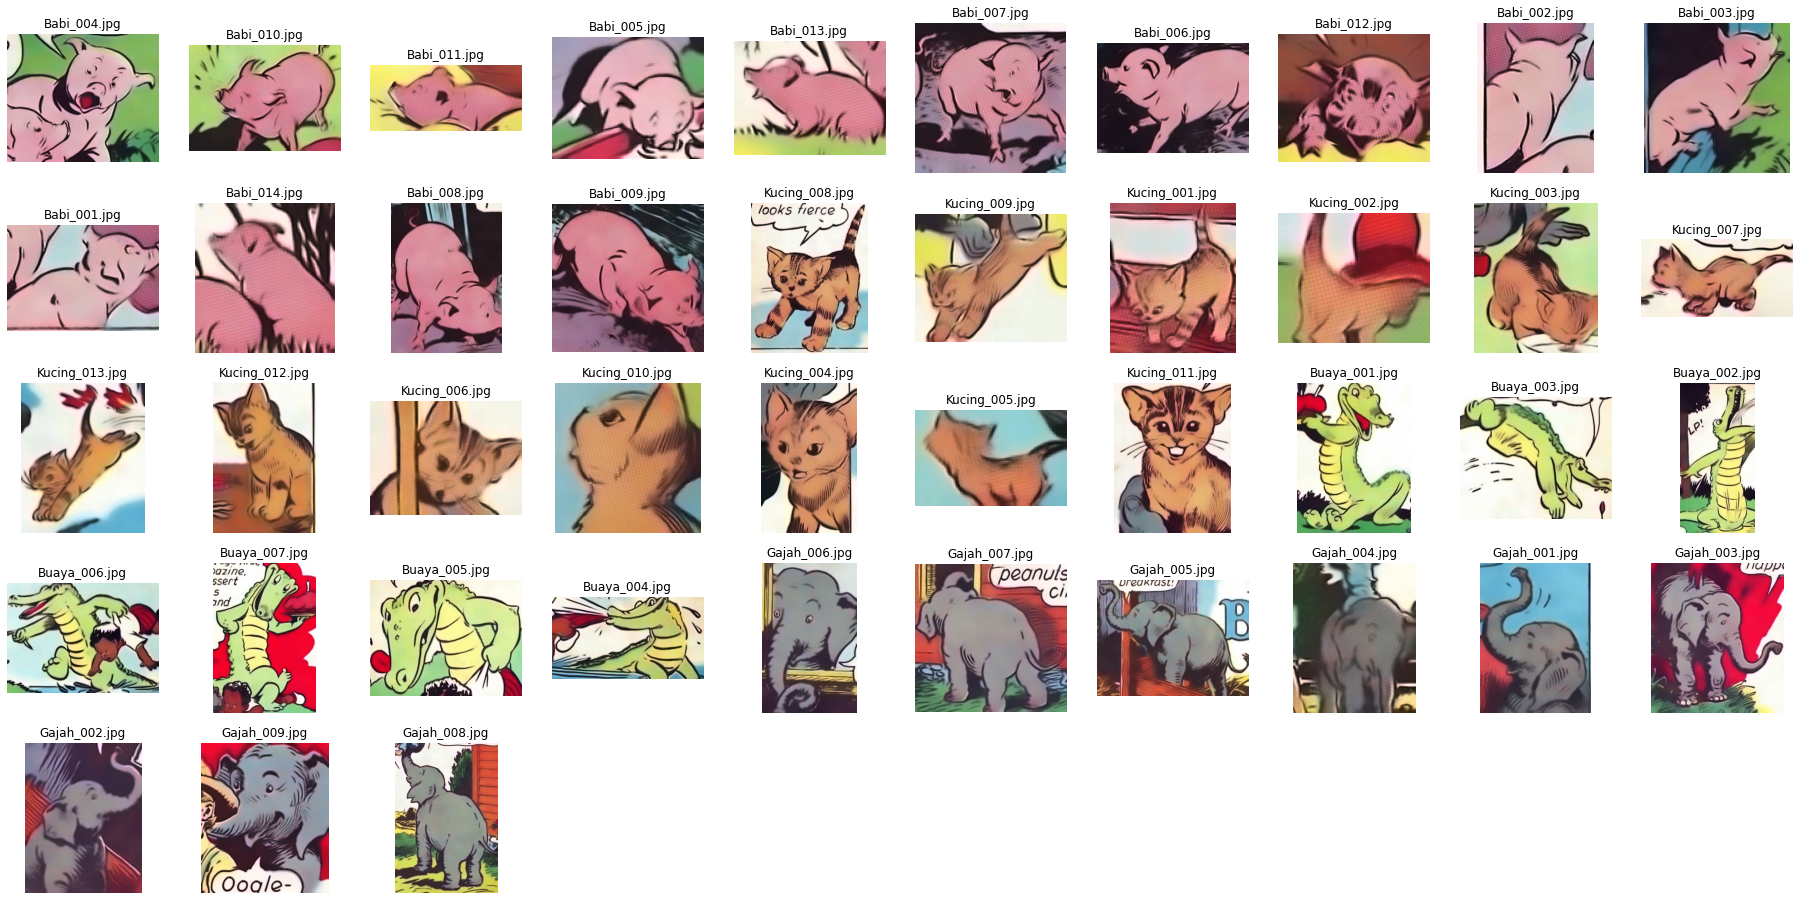

In [3]:
fig = plt.figure(figsize=(32, 16))
rows = 5
columns = 10


for i,image_path in enumerate(image_paths):

    label = image_path.split(os.path.sep)[-2]
    filename = image_path.split(os.path.sep)[-1]

    
    image = cv2.imread(image_path,flags=cv2.IMREAD_COLOR) 
    # image = cv2.resize(image,(256,256),interpolation=cv2.INTER_AREA)
    
    rgb = cv2.cvtColor(image,code=cv2.COLOR_BGR2RGB)
    noisereduced = cv2.fastNlMeansDenoisingColored(rgb,None,32,32,7,21)

    fig.add_subplot(rows,columns,i+1)
    cv2.imwrite("./dataset/denoised/{}/{}".format(label,filename),cv2.cvtColor(noisereduced,cv2.COLOR_RGB2BGR),)

    plt.imshow(noisereduced)
    plt.title(label=filename)
    plt.axis(False)


# Mask Filter

In [4]:
## Load Denoised Image
image_paths = list(paths.list_images("./dataset/denoised/babi"))

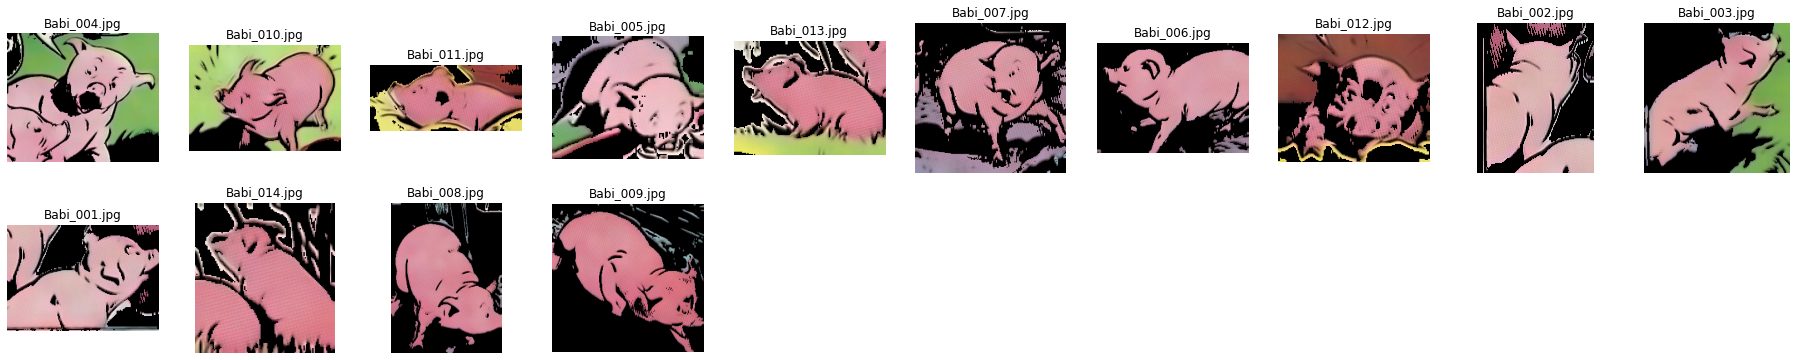

In [5]:
fig = plt.figure(figsize=(32, 16))
rows = 5
columns = 10

# define range of red color in HSV
babi_threshold = np.array([[169 , -1, 180], [179 ,  127,  244]])
buaya_threshold = np.array([[18 ,-1, 114],[59 , 255, 235]])
gajah_threshold = np.array([[0 , -1, 115],[179 ,  51,  179]])
kucing_threshold = np.array([[0 ,-1,  89],[17 ,  162,244]])


for i,image_path in enumerate(image_paths):
    label = image_path.split(os.path.sep)[-1]
    image = cv2.imread(image_path, flags=cv2.IMREAD_COLOR)
    rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    
    hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)

    masked_babi = cv2.inRange(hsv,babi_threshold[0],babi_threshold[1])
    masked_buaya = cv2.inRange(hsv,buaya_threshold[0],buaya_threshold[1])
    masked_gajah = cv2.inRange(hsv,gajah_threshold[0],gajah_threshold[1])
    masked_kucing = cv2.inRange(hsv,kucing_threshold[0],kucing_threshold[1])

    fig.add_subplot(rows,columns,i+1)

    babi_buaya = cv2.add(masked_babi,masked_buaya)
    gajah_kucing = cv2.add(masked_gajah,masked_kucing,)
    combined = cv2.add(babi_buaya,gajah_kucing)


    eroded = cv2.dilate(combined,(3,3),iterations=1)
    delated = cv2.dilate(eroded,(3,3),iterations=1)
    


    selected_image = cv2.bitwise_and(rgb,rgb,mask=delated)
    plt.title(label)
    plt.axis(False)
    plt.imshow(selected_image,cmap='gray')

# Preprocessing Recap

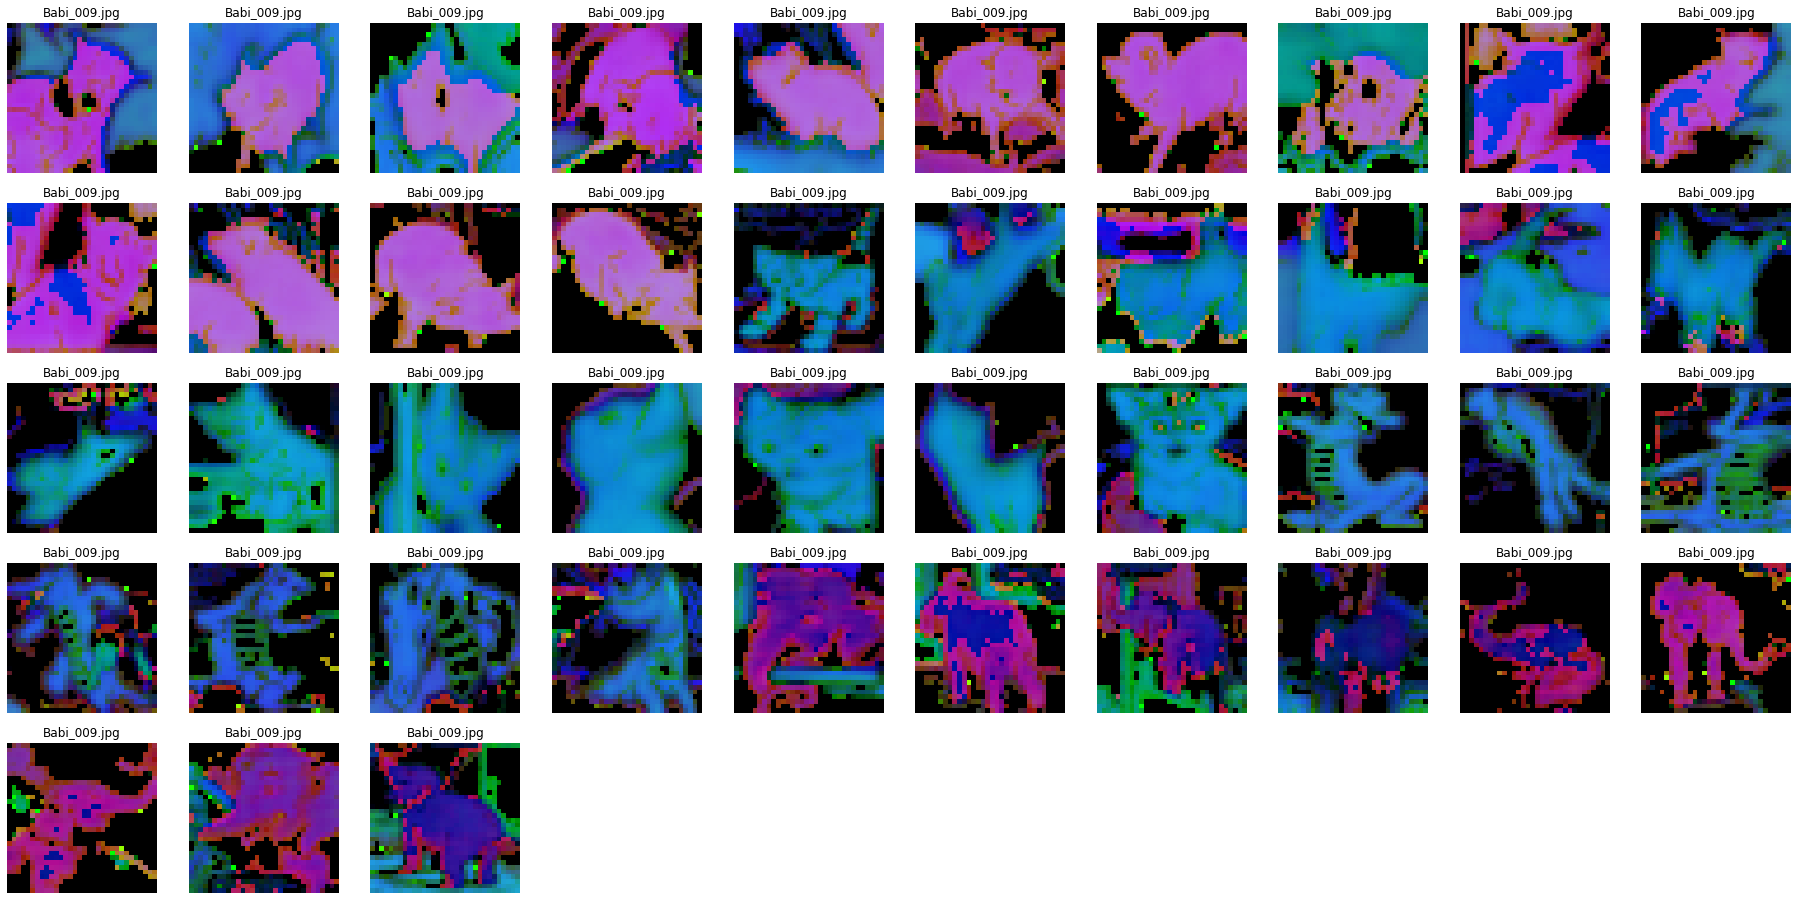

In [6]:
image_paths = list(paths.list_images("./raw"))

# define range of red color in HSV
babi_threshold = np.array([[169 , -1, 180], [179 ,  127,  244]])
buaya_threshold = np.array([[18 ,-1, 114],[59 , 255, 235]])
gajah_threshold = np.array([[0 , -1, 115],[179 ,  51,  179]])
kucing_threshold = np.array([[0 ,-1,  89],[17 ,  162,244]])

fig = plt.figure(figsize=(32, 16))
rows = 5
columns = 10

width = 32
heigh = 32

for i,image_path in enumerate(image_paths):
    image = cv2.imread(image_path,flags=cv2.IMREAD_COLOR)

    rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    # Reduce Noice
    noisereduced = cv2.fastNlMeansDenoisingColored(rgb,None,32,32,7,21)

    hsv = cv2.cvtColor(noisereduced,cv2.COLOR_RGB2HSV)

    masked_babi = cv2.inRange(hsv,babi_threshold[0],babi_threshold[1])
    masked_buaya = cv2.inRange(hsv,buaya_threshold[0],buaya_threshold[1])
    masked_gajah = cv2.inRange(hsv,gajah_threshold[0],gajah_threshold[1])
    masked_kucing = cv2.inRange(hsv,kucing_threshold[0],kucing_threshold[1])

    babi_buaya = cv2.add(masked_babi,masked_buaya)
    gajah_kucing = cv2.add(masked_gajah,masked_kucing,)
    combined = cv2.add(babi_buaya,gajah_kucing)


    eroded = cv2.dilate(combined,(3,3),iterations=1)
    delated = cv2.dilate(eroded,(3,3),iterations=1)
        

    selected_image = cv2.bitwise_and(noisereduced,noisereduced,mask=delated)
    selected_image = cv2.resize(selected_image,(width,heigh),interpolation=cv2.INTER_AREA)
    selected_image = cv2.cvtColor(selected_image,cv2.COLOR_RGB2HSV)
    fig.add_subplot(rows,columns,i+1)

    
    plt.title(label)
    plt.axis(False)
    plt.imshow(selected_image,cmap='gray')